# Pandas

In [160]:
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
import math
import scipy as sp
from scipy import integrate
from scipy import linalg

## Загрузка данных и предварительный анализ

In [19]:
data = pd.read_csv("C:/Users/rediv/OneDrive/Desktop/share-of-calories-from-animal-protein-vs-mean-male-height.csv", index_col=False)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24479 entries, 0 to 24478
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Entity                                     24479 non-null  object 
 1   Code                                       23668 non-null  object 
 2   Year                                       24479 non-null  int64  
 3   Calories from animal protein (FAO (2017))  8981 non-null   float64
 4   Mean male height (cm)                      21008 non-null  float64
 5   Continent                                  285 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.1+ MB


In [21]:
data.describe()

,Year,Calories from animal protein (FAO (2017)),Mean male height (cm)
count,24479.00000,8981.000000,21008.000000
mean,1954.21496,126.236535,168.326718
std,33.91391,79.768442,5.225347
min,1896.00000,10.240000,152.884624
25%,1925.00000,57.320000,164.573544
50%,1954.00000,107.720000,168.314950
75%,1983.00000,192.440000,171.634683
max,2015.00000,422.720000,182.567309


In [26]:
data.head()

,Entity,Code,Year,Calories from animal protein (FAO (2017)),Mean male height (cm),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,Asia
1,Afghanistan,AFG,1961,54.12,164.797132,NaN
2,Afghanistan,AFG,1962,53.92,164.849830,NaN
3,Afghanistan,AFG,1963,56.80,164.899145,NaN
4,Afghanistan,AFG,1964,57.32,164.943613,NaN


In [27]:
data.tail()

,Entity,Code,Year,Calories from animal protein (FAO (2017)),Mean male height (cm),Continent
24474,Zimbabwe,ZWE,1958,NaN,170.803172,NaN
24475,Zimbabwe,ZWE,1959,NaN,170.890578,NaN
24476,Zimbabwe,ZWE,1960,NaN,170.974537,NaN
24477,Zimbabwe,ZWE,2015,NaN,NaN,Africa
24478,Åland Islands,ALA,2015,NaN,NaN,Europe


In [24]:
len(data['Entity'].unique())

295

In [76]:
data.groupby('Entity').mean().iloc[:, [0,2]]

,Year,Mean male height (cm)
Entity,,
Abkhazia,2015.000000,NaN
Afghanistan,1955.008403,163.634297
Akrotiri and Dhekelia,2015.000000,NaN
Albania,1955.008403,170.035486
Algeria,1955.008403,168.681924
...,...,...
Yugoslavia,1977.218750,NaN
Zambia,1955.008403,167.000935
Zanzibar,2015.000000,NaN


In [86]:
data1 = data.groupby('Year').mean().iloc[:,0:2]
data1

,Calories from animal protein (FAO (2017)),Mean male height (cm)
Year,,
1896,NaN,162.480653
1897,NaN,162.598008
1898,NaN,162.715559
1899,NaN,162.833258
1900,NaN,162.950989
...,...,...
2010,145.156552,NaN
2011,146.365780,NaN
2012,146.838613,NaN


In [81]:
data1 = data1.rename({'Mean male height (cm)': 'Mean_male_height'}, axis=1)

## График зависимости среднего роста мужчин от года

<AxesSubplot:xlabel='Year', ylabel='Mean_male_height'>

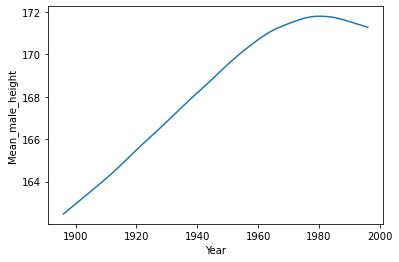

In [82]:
sns.lineplot(x="Year", y="Mean_male_height", data=data1)

# Numpy

In [93]:
np.zeros(10, dtype=np.int64)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [95]:
np.full(10, 5.8)

array([5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8])

In [119]:
np.random.rand(3, 3, 3).round(2)

array([[[0.26, 0.97, 0.21],
        [0.58, 0.32, 0.98],
        [0.83, 0.86, 0.7 ]],

       [[0.22, 0.56, 0.24],
        [0.34, 0.62, 0.09],
        [0.44, 0.1 , 0.89]],

       [[0.36, 0.46, 0.56],
        [0.24, 0.97, 0.48],
        [0.96, 0.96, 0.97]]])

In [147]:
chess = np.zeros((8, 8))

In [148]:
chess[::2, ::2] = 1
chess[1::2, 1::2] = 1

In [149]:
chess

array([[1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.]])

In [163]:
matrix = np.random.rand(4, 4).round(2)

# Scipy

In [156]:
f1 = lambda x: math.sin(x)*x**2
integrate.quad(f1, -3, 10)

(63.57192010714263, 2.1778037844715755e-12)

In [164]:
linalg.det(matrix)

-0.029135860000000006

In [165]:
linalg.inv(matrix)

array([[-1.85839718, -2.24040066,  1.835779  ,  4.05932758],
       [ 2.87487653, -5.82018173,  0.08738373,  4.47276998],
       [-0.46595501,  1.58800873, -0.81404839,  0.43787964],
       [-0.23778258,  3.34426374,  0.14439251, -3.72468841]])

In [166]:
linalg.eig(matrix)

(array([ 1.61046386+0.j, -0.52177045+0.j, -0.22367889+0.j, -0.15501452+0.j]),
 array([[ 0.55055862, -0.37218162,  0.84691916, -0.7071784 ],
        [ 0.52375329,  0.27017869,  0.16674174, -0.47659227],
        [ 0.51990429, -0.74086442,  0.09489163,  0.0353302 ],
        [ 0.39021434,  0.48949385, -0.49590392,  0.52106649]]))

# Matplotlib/Seaborn

In [167]:
import matplotlib.pyplot as plt

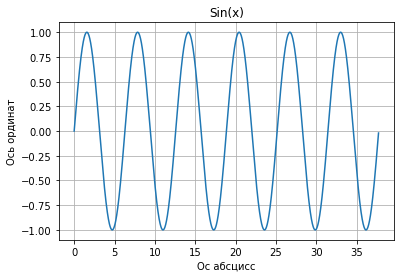

In [183]:
lag = 0.0001
x = np.arange(0.0, 12.56*3, lag)
y = np.sin(x)

fig = plt.figure()
plt.plot(x, y)
plt.grid()

plt.title('Sin(x)')
plt.ylabel('Ось ординат')
plt.xlabel('Ось абсцисс');

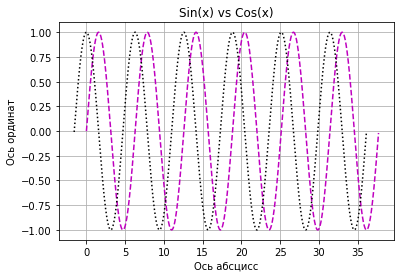

In [221]:
lag = 0.0001
x1 = np.arange(0.0, 12.56*3, lag)
x2 = np.arange(-1.58, 36.12, lag)
y1 = np.sin(x1)
y2 = np.cos(x2)

fig = plt.figure()
plt.plot(x1, y1, '--m', x2, y2, ':k')
plt.grid()

plt.title('Sin(x) vs Cos(x)')
plt.ylabel('Ось ординат')
plt.xlabel('Ось абсцисс');

Text(0.5, 1.0, 'cos(x)')

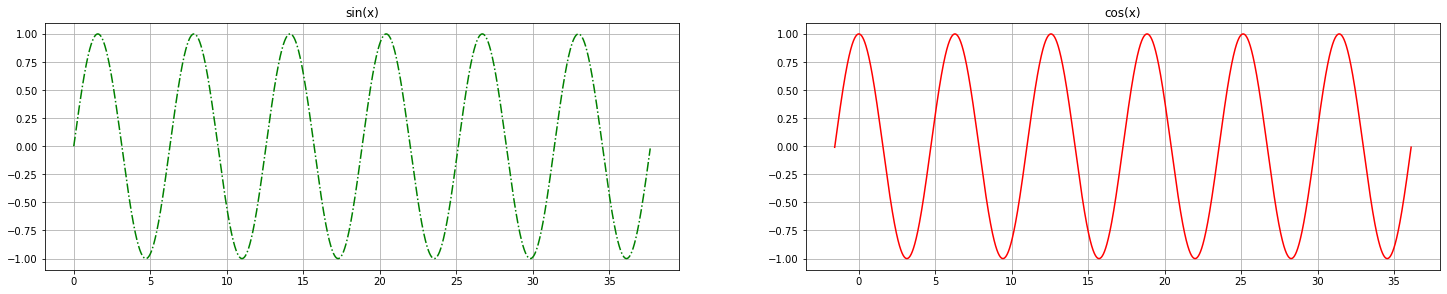

In [226]:
plt.figure(figsize=(25, 10))

plt.subplot(2, 2, 1)
plt.plot(x1, y1, '-.g')
plt.grid()
plt.title('sin(x)')

plt.subplot(2, 2, 2)
plt.plot(x2, y2, '-r')
plt.grid()
plt.title('cos(x)')

# УРОК 2

# Pandas

In [227]:
data.head()

,Entity,Code,Year,Calories from animal protein (FAO (2017)),Mean male height (cm),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,Asia
1,Afghanistan,AFG,1961,54.12,164.797132,NaN
2,Afghanistan,AFG,1962,53.92,164.849830,NaN
3,Afghanistan,AFG,1963,56.80,164.899145,NaN
4,Afghanistan,AFG,1964,57.32,164.943613,NaN


In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24479 entries, 0 to 24478
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Entity                                     24479 non-null  object 
 1   Code                                       23668 non-null  object 
 2   Year                                       24479 non-null  int64  
 3   Calories from animal protein (FAO (2017))  8981 non-null   float64
 4   Mean male height (cm)                      21008 non-null  float64
 5   Continent                                  285 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.1+ MB


In [229]:
data.isnull().sum()

Entity                                           0
Code                                           811
Year                                             0
Calories from animal protein (FAO (2017))    15498
Mean male height (cm)                         3471
Continent                                    24194
dtype: int64

In [230]:
data.describe()

,Year,Calories from animal protein (FAO (2017)),Mean male height (cm)
count,24479.00000,8981.000000,21008.000000
mean,1954.21496,126.236535,168.326718
std,33.91391,79.768442,5.225347
min,1896.00000,10.240000,152.884624
25%,1925.00000,57.320000,164.573544
50%,1954.00000,107.720000,168.314950
75%,1983.00000,192.440000,171.634683
max,2015.00000,422.720000,182.567309


In [231]:
data.corr()

,Year,Calories from animal protein (FAO (2017)),Mean male height (cm)
Year,1.000000,0.158168,0.572136
Calories from animal protein (FAO (2017)),0.158168,1.000000,0.720534
Mean male height (cm),0.572136,0.720534,1.000000


In [249]:
data.loc[(data['Entity']=='Albania'), 'Continent'] = 'Europe'

In [252]:
data.loc[(data['Entity']=='Algeria'), 'Continent'] = 'Africa'

In [254]:
data.loc[(data['Entity']=='American Samoa'), 'Continent'] = 'Oceania'

In [256]:
data.loc[(data['Entity']=='Andorra'), 'Continent'] = 'Europe'

In [258]:
data.loc[(data['Entity']=='Zimbabwe'), 'Continent'] = 'Africa'

In [265]:
data.loc[(data['Entity']=='Austria') | (data['Entity']=='Russia'), 'Continent'] = 'Europe'

In [266]:
data[data['Continent'].isnull()]

,Entity,Code,Year,Calories from animal protein (FAO (2017)),Mean male height (cm),Continent
563,Angola,AGO,1961,29.84,169.694701,NaN
564,Angola,AGO,1962,31.92,169.766976,NaN
565,Angola,AGO,1963,31.24,169.829845,NaN
566,Angola,AGO,1964,36.80,169.881452,NaN
567,Angola,AGO,1965,37.28,169.922472,NaN
...,...,...,...,...,...,...
24352,Zambia,ZMB,1956,NaN,169.261076,NaN
24353,Zambia,ZMB,1957,NaN,169.319461,NaN
24354,Zambia,ZMB,1958,NaN,169.374156,NaN
24355,Zambia,ZMB,1959,NaN,169.424234,NaN


In [251]:
data['Continent'].unique()

array(['Asia', 'Europe', nan, 'Africa', 'Oceania', 'North America',
       'Antarctica', 'South America'], dtype=object)

In [263]:
data['Entity'].value_counts().head(20)

Uruguay               119
Azerbaijan            119
Oman                  119
Australia             119
Kyrgyzstan            119
Madagascar            119
Dominican Republic    119
Russia                119
Panama                119
Benin                 119
Lesotho               119
Sri Lanka             119
Dominica              119
Kiribati              119
Guinea-Bissau         119
Barbados              119
Nicaragua             119
Japan                 119
Austria               119
Morocco               119
Name: Entity, dtype: int64

In [286]:
data.insert(5, "Mean_male_height_inch", data.iloc[:, 4][data.iloc[:, 4].notnull()]/2.54)

In [291]:
data

,Entity,Code,Year,Calories from animal protein (FAO (2017)),Mean male height (cm),Mean_male_height_inch,Height/calories,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1961,54.12,164.797132,64.880761,64.880761,Asia
2,Afghanistan,AFG,1962,53.92,164.849830,64.901508,64.901508,Asia
3,Afghanistan,AFG,1963,56.80,164.899145,64.920923,64.920923,Asia
4,Afghanistan,AFG,1964,57.32,164.943613,64.938430,64.938430,Asia
...,...,...,...,...,...,...,...,...
24474,Zimbabwe,ZWE,1958,NaN,170.803172,67.245343,67.245343,Africa
24475,Zimbabwe,ZWE,1959,NaN,170.890578,67.279755,67.279755,Africa
24476,Zimbabwe,ZWE,1960,NaN,170.974537,67.312810,67.312810,Africa
24477,Zimbabwe,ZWE,2015,NaN,NaN,NaN,NaN,Africa


In [297]:
data = data.drop(['Height/calories'], axis=1)

In [299]:
data.insert(5, "Height/calories", data.iloc[:, 4][data.iloc[:, 4].notnull()]/data.iloc[:, 3][data.iloc[:, 3].notnull()])

In [301]:
data.head(30)

,Entity,Code,Year,Calories from animal protein (FAO (2017)),Mean male height (cm),Height/calories,Mean_male_height_inch,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1961,54.12,164.797132,3.045032,64.880761,Asia
2,Afghanistan,AFG,1962,53.92,164.849830,3.057304,64.901508,Asia
3,Afghanistan,AFG,1963,56.80,164.899145,2.903154,64.920923,Asia
4,Afghanistan,AFG,1964,57.32,164.943613,2.877593,64.938430,Asia
5,Afghanistan,AFG,1965,59.76,164.983130,2.760762,64.953988,Asia
6,Afghanistan,AFG,1966,64.44,165.018904,2.560815,64.968073,Asia
7,Afghanistan,AFG,1967,67.08,165.051753,2.460521,64.981005,Asia
8,Afghanistan,AFG,1968,69.88,165.082659,2.362373,64.993173,Asia
9,Afghanistan,AFG,1969,68.76,165.113500,2.401302,65.005315,Asia


# Numpy

In [308]:
a = np.array([[1, -2, 4],[2, 0, -1]])
b = np.array([[5, 2, 3], [4, 6, 2]])
a + b, a - b

(array([[6, 0, 7],
        [6, 6, 1]]),
 array([[-4, -4,  1],
        [-2, -6, -3]]))

In [307]:
a1 = np.array([[1, 2], [2, -1], [3, 0]])
b1 = np.array([[-1, 1], [1, 2], [0, 0]])
c1 = a1 - 3*b1
c1

array([[ 4, -1],
       [-1, -7],
       [ 3,  0]])

In [312]:
a2 = np.array([[1, -1], [2, 0], [3, 0]])
b2 = np.array([[1, 1], [2, 0]])
c3 = np.dot(a2, b2)
c3

array([[-1,  1],
       [ 2,  2],
       [ 3,  3]])

In [314]:
a4 = np.array([[6, -1, 4], [2, 1, 10], [8, 0, 2]])
np.linalg.det(a4)

-95.99999999999999

In [331]:
a5 = np.array([[3, 3, -1], [4, 1, 3], [1, -2, -2]])
a5_inv = np.linalg.inv(a5)

In [332]:
prod = a5_inv.dot(a5)
prod

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.77555756e-17,  1.00000000e+00, -1.11022302e-16],
       [-2.77555756e-17, -5.55111512e-17,  1.00000000e+00]])

In [333]:
np.round(prod, 0)

array([[ 1.,  0.,  0.],
       [-0.,  1., -0.],
       [-0., -0.,  1.]])